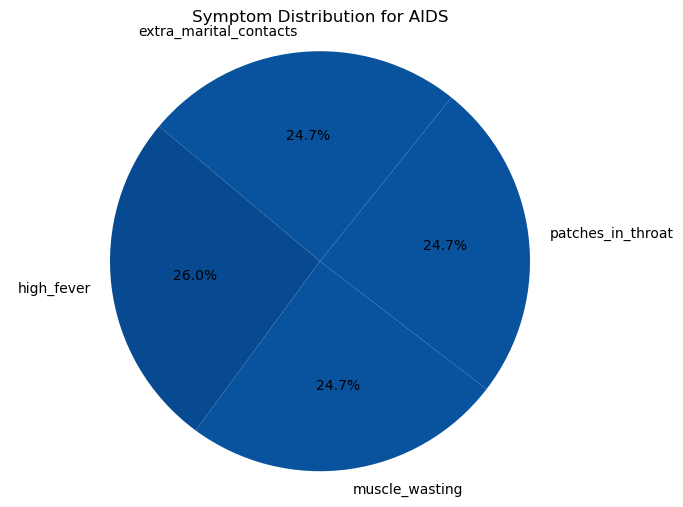

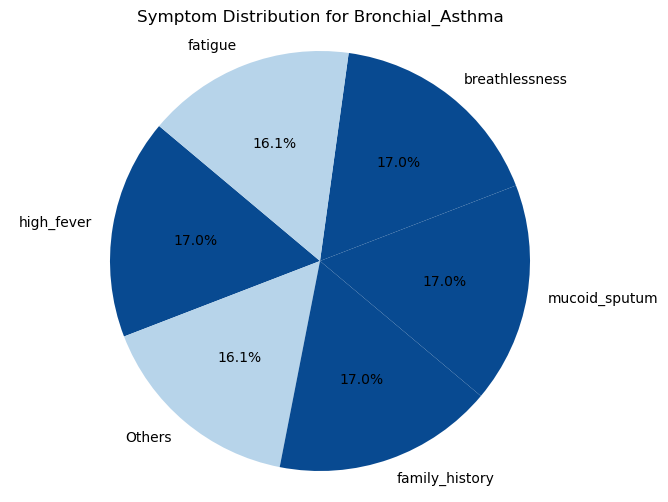

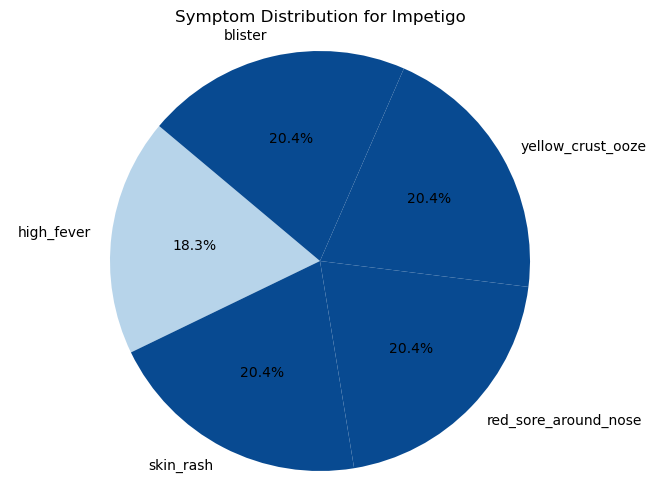

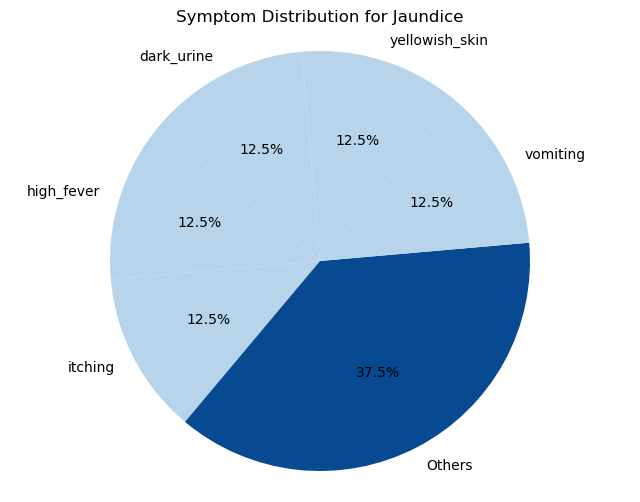

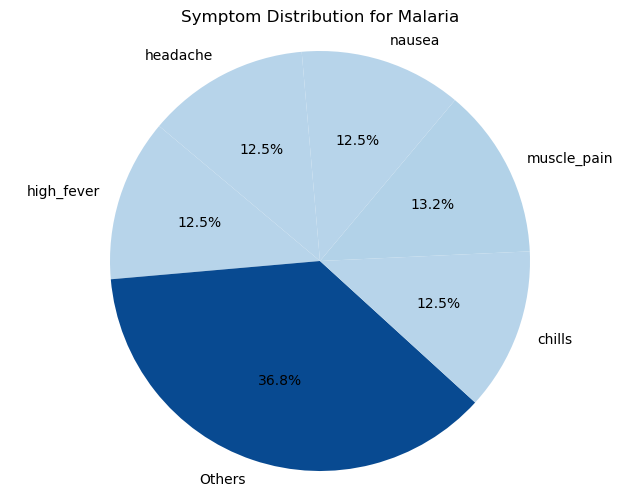

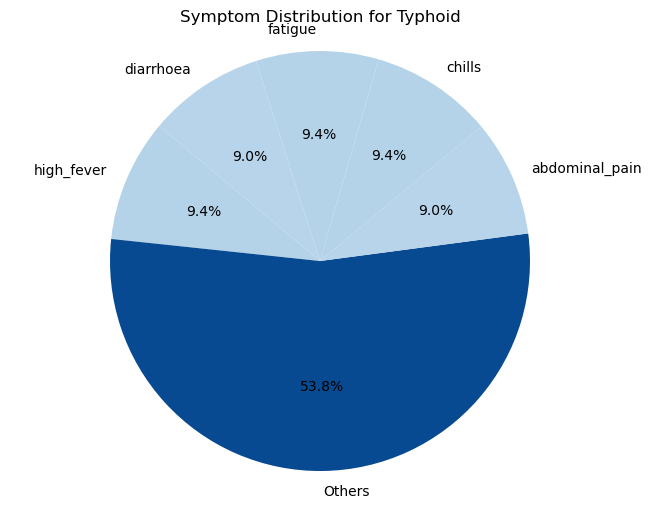

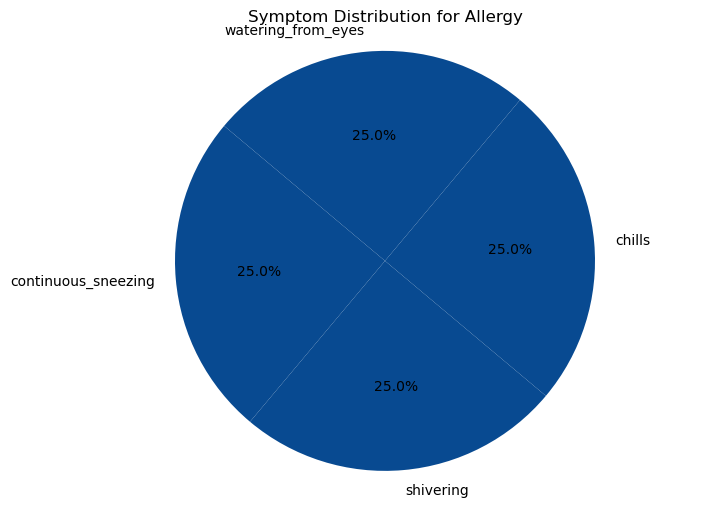

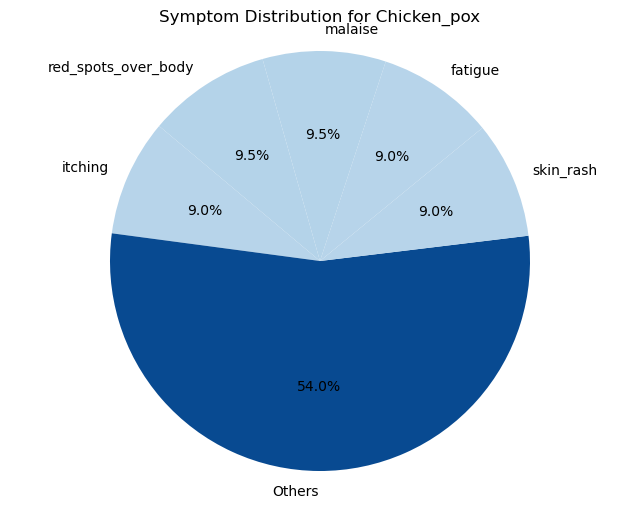

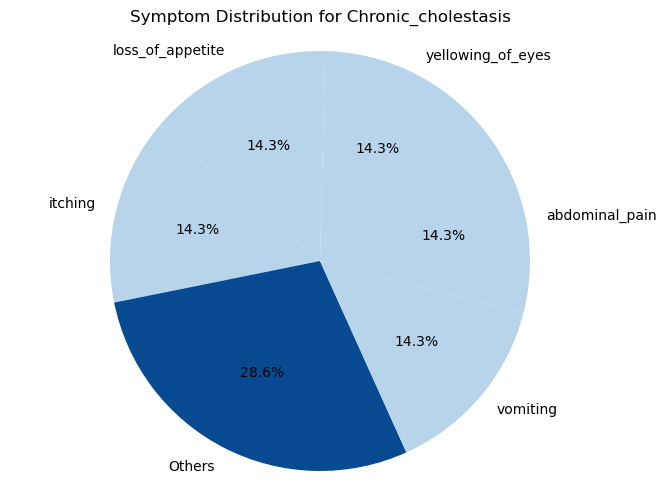

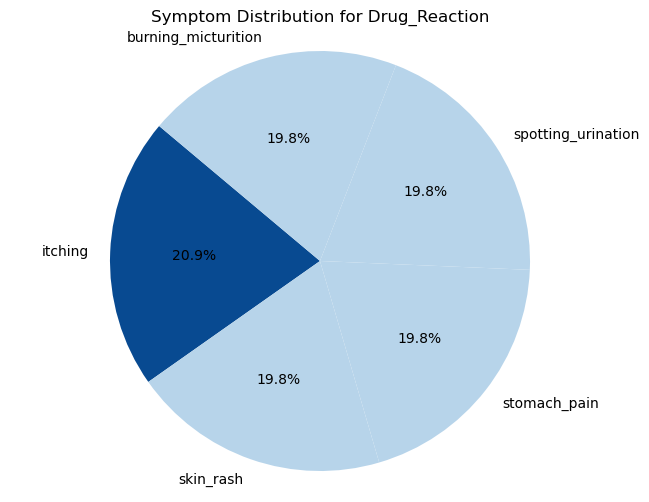

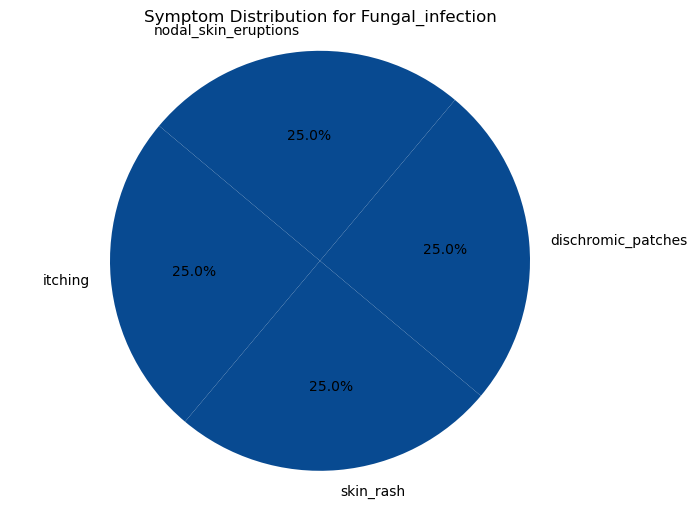

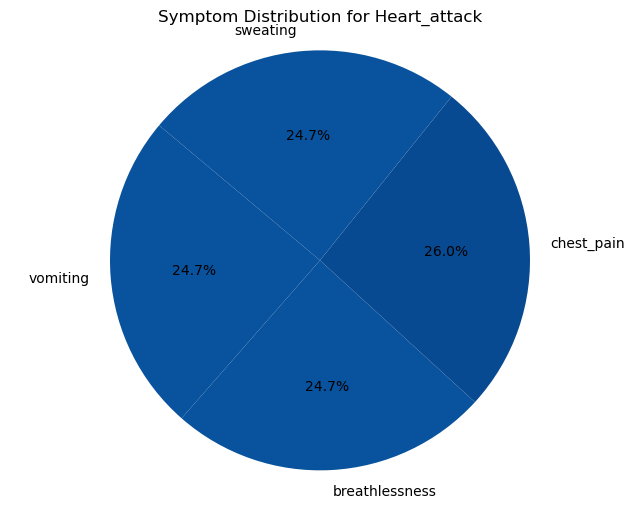

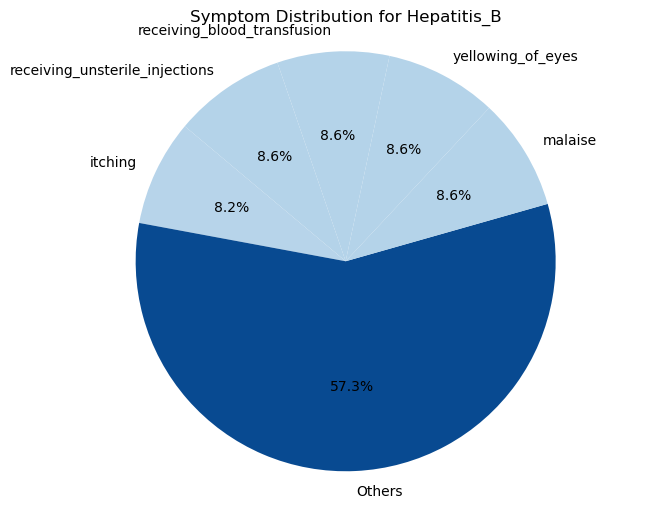

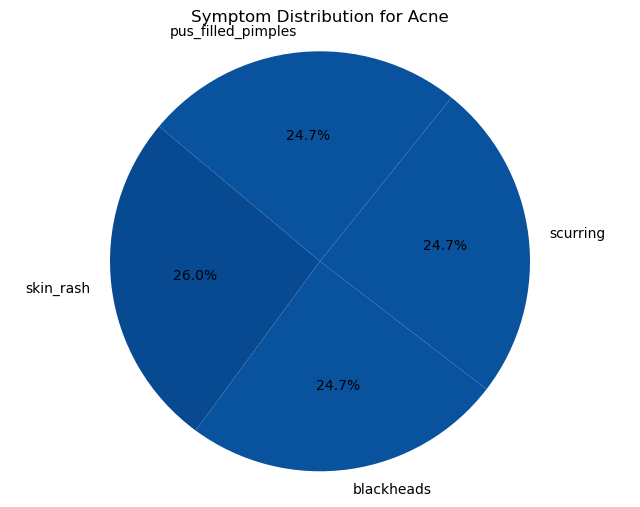

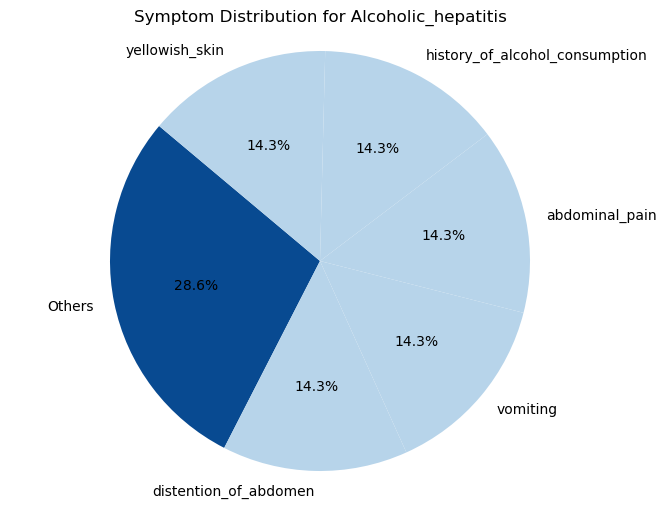

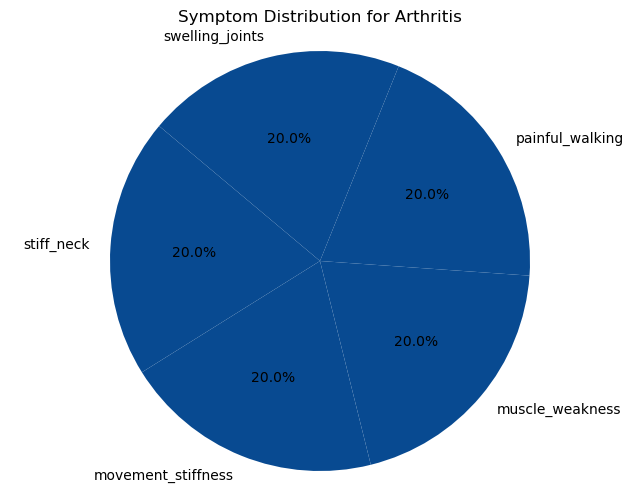

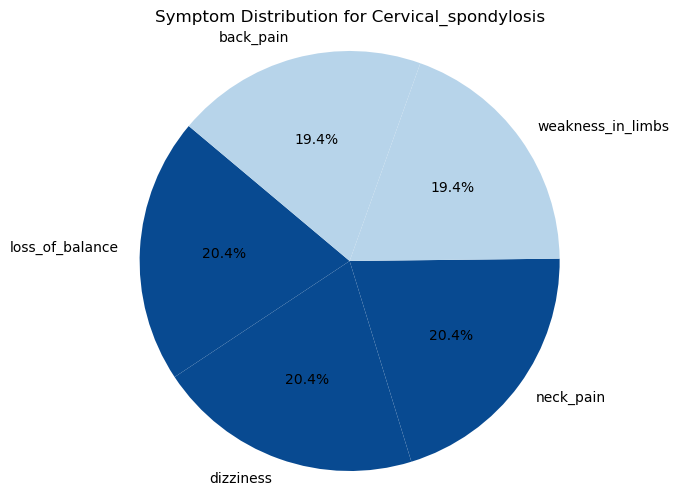

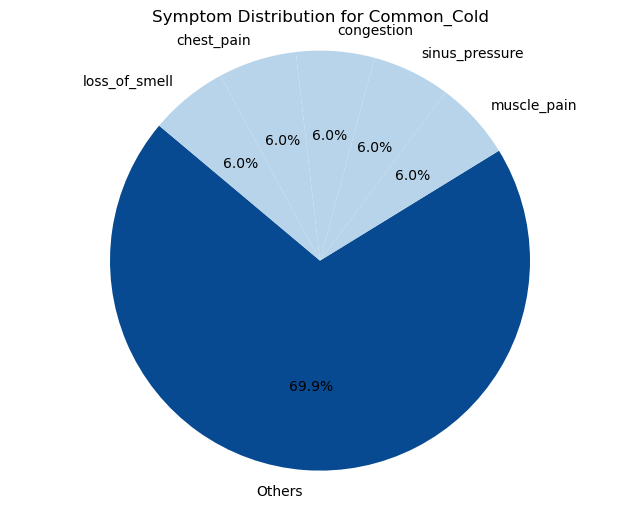

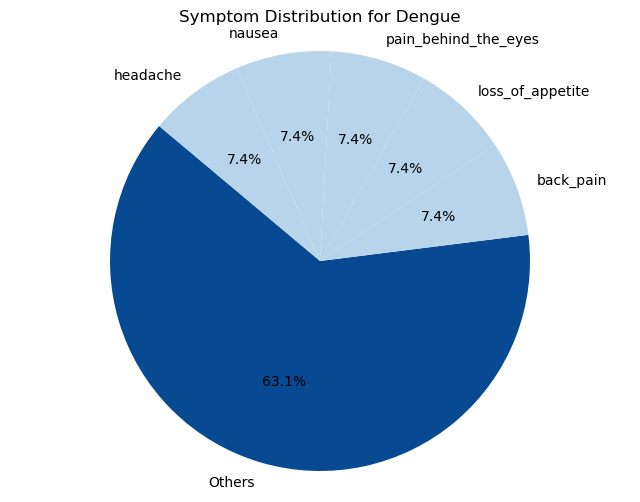

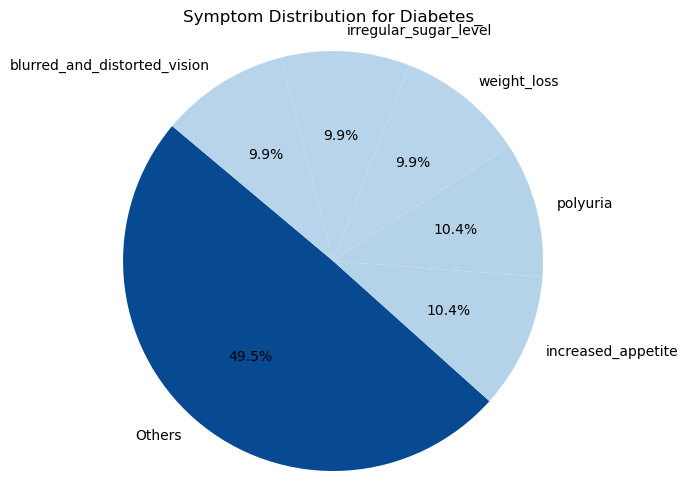

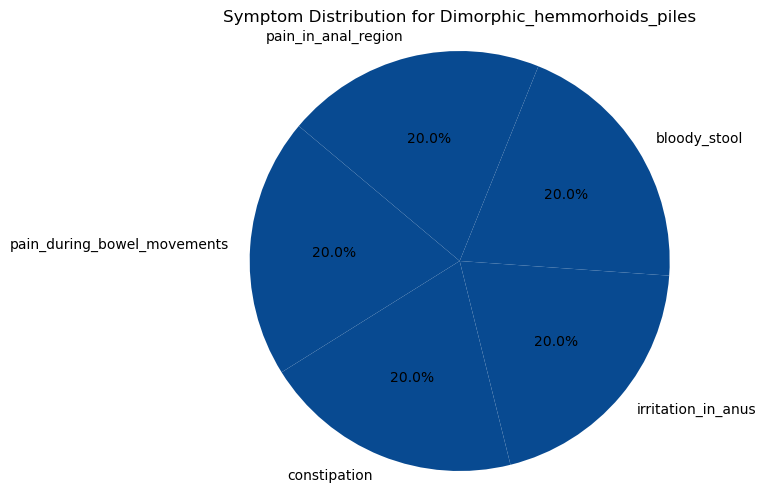

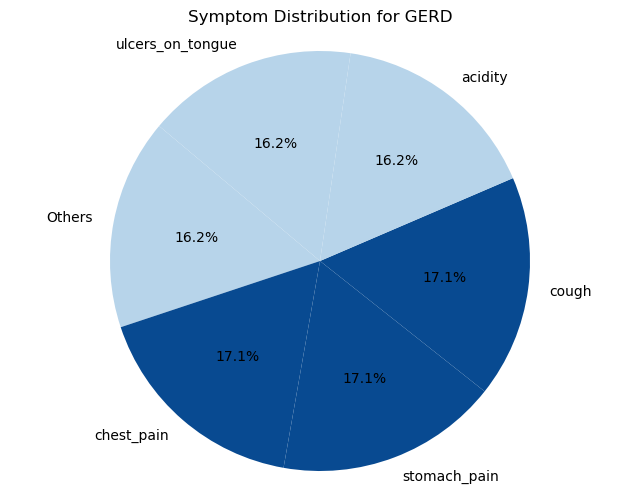

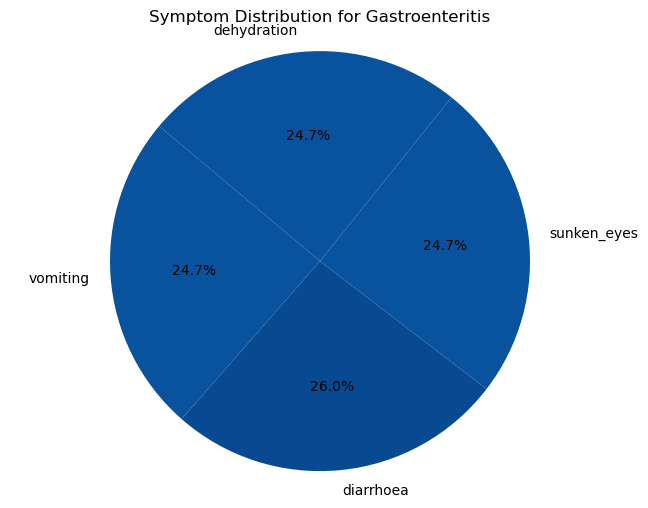

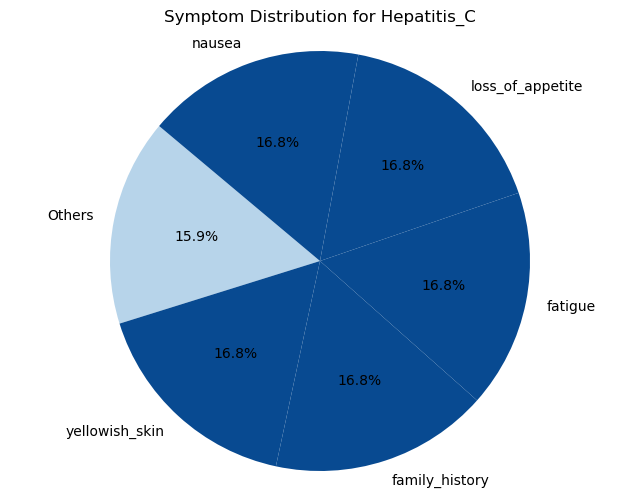

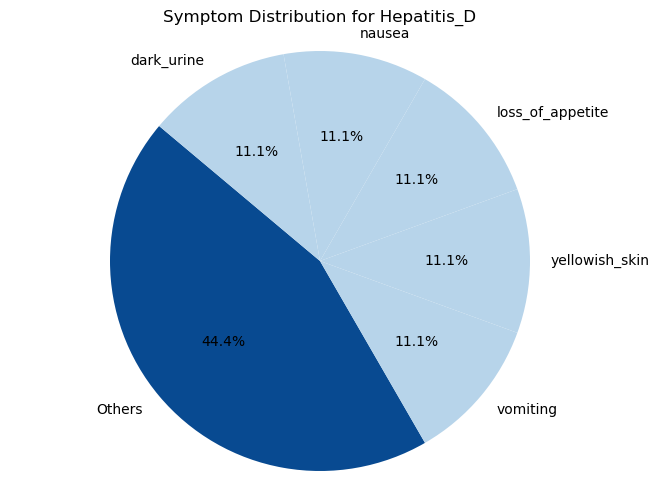

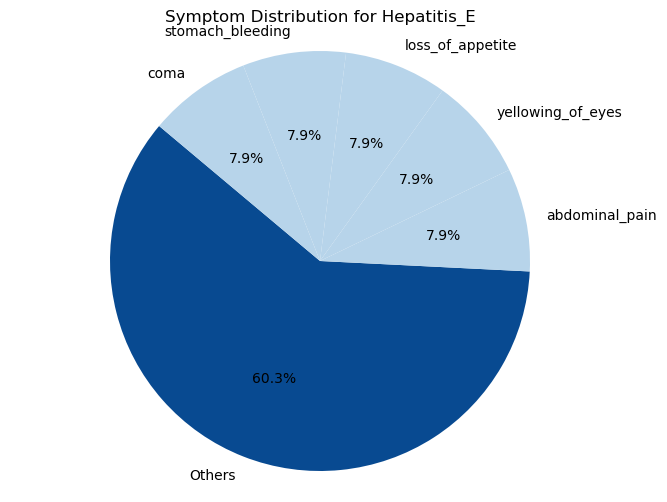

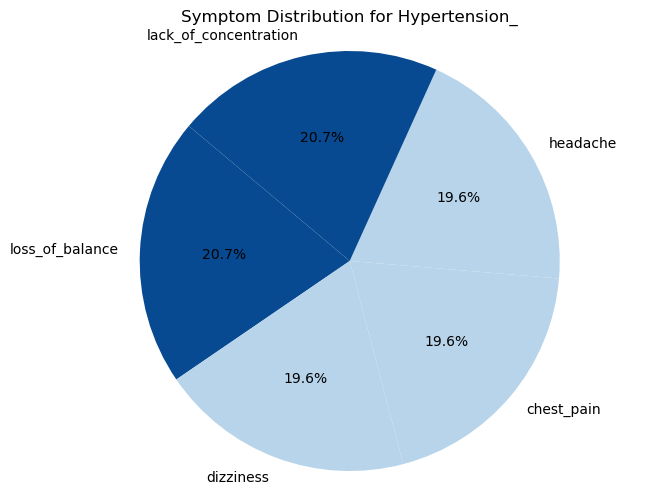

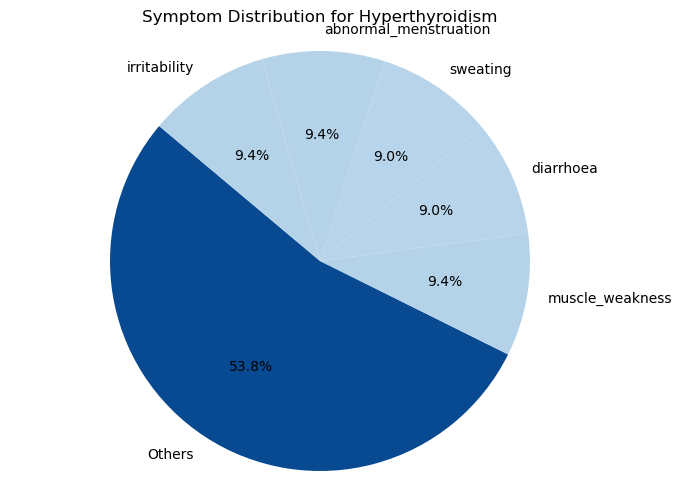

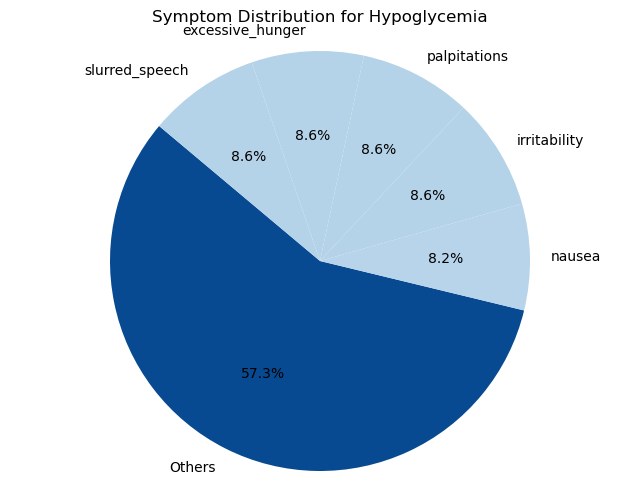

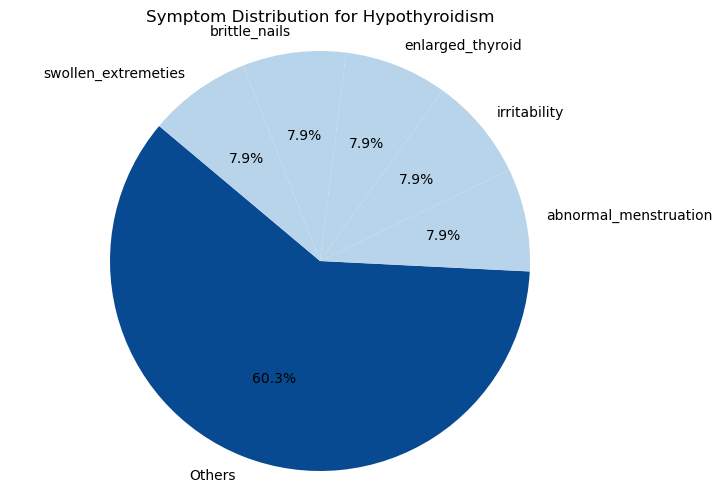

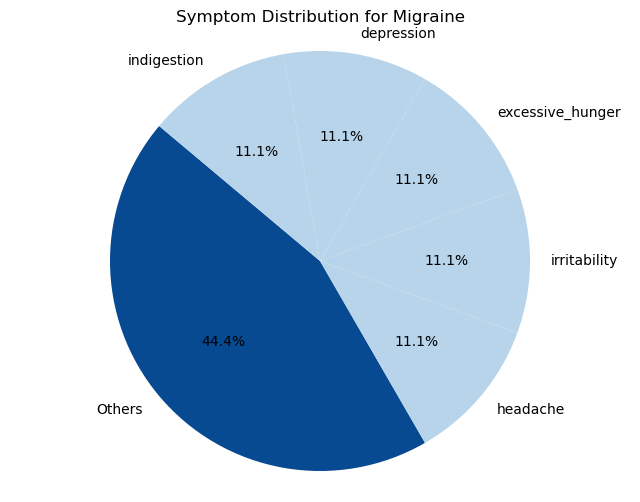

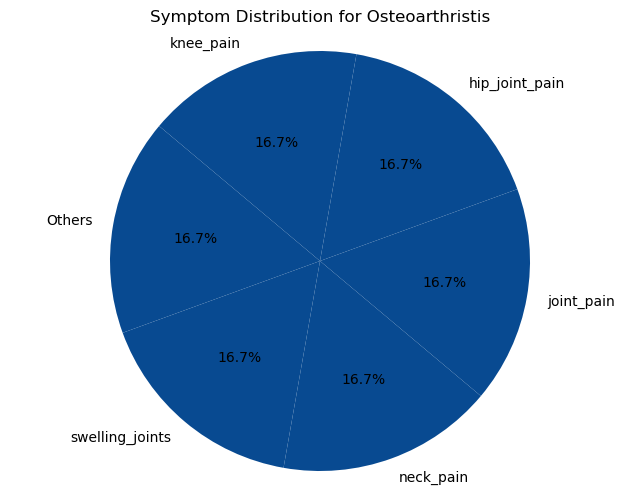

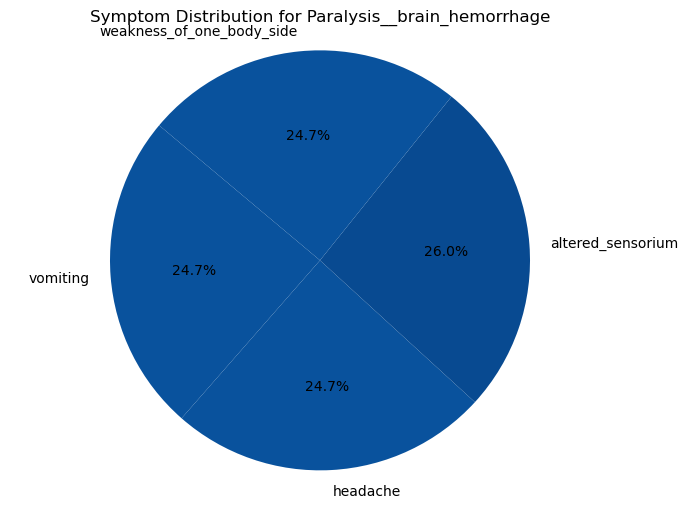

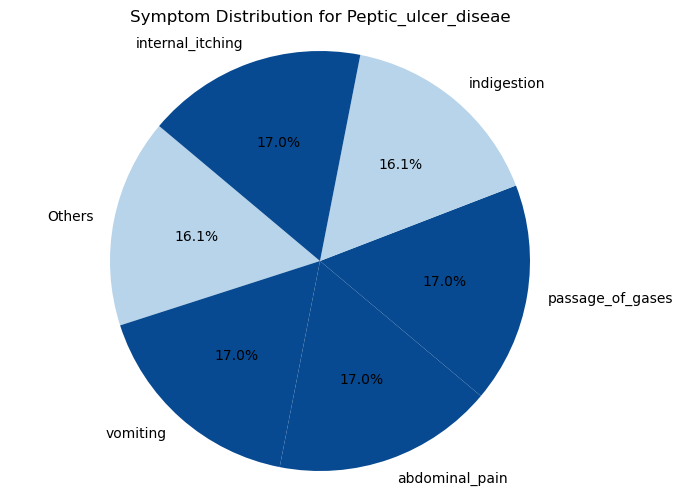

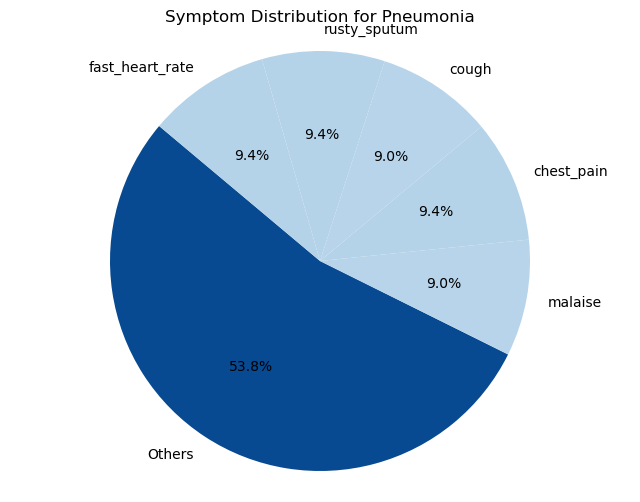

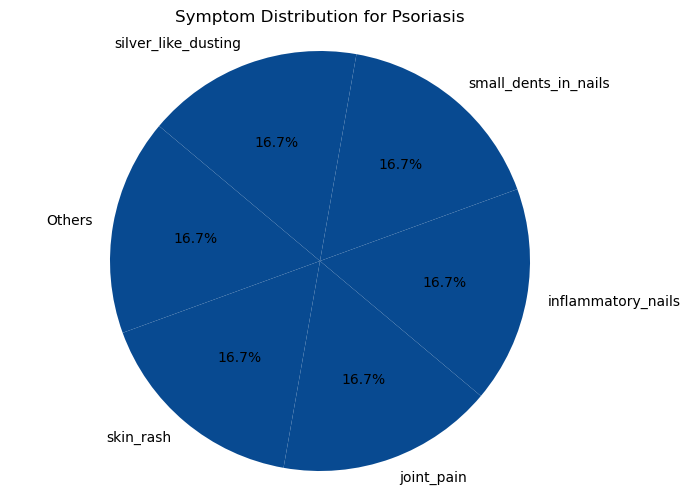

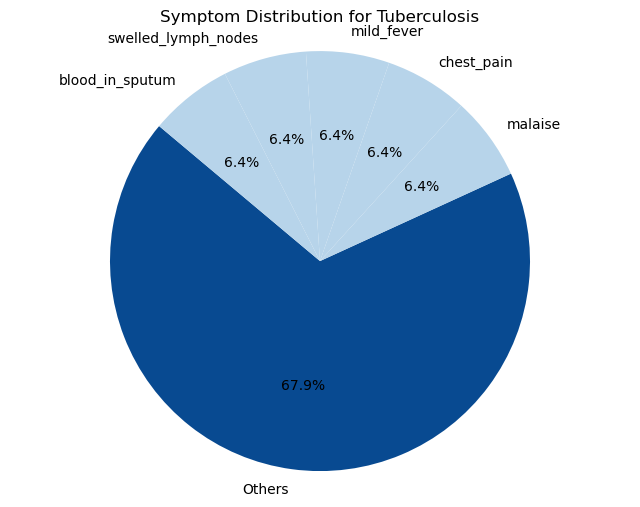

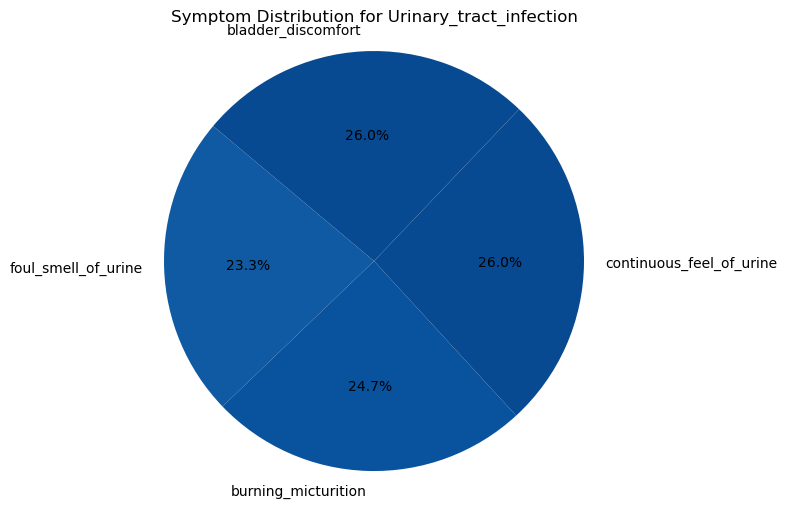

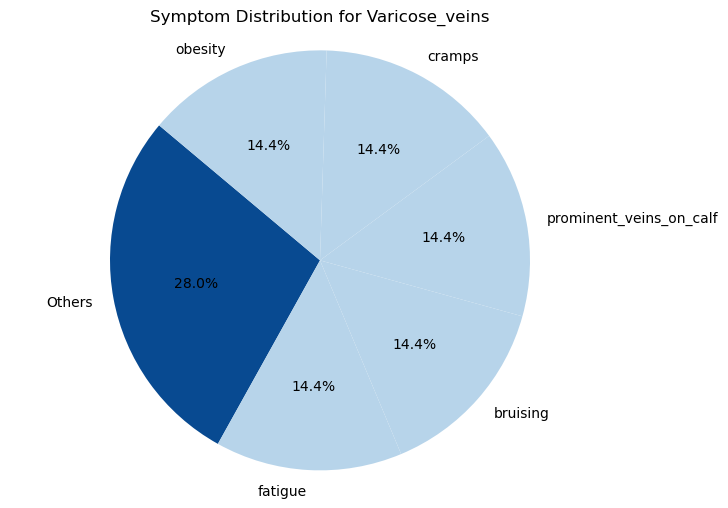

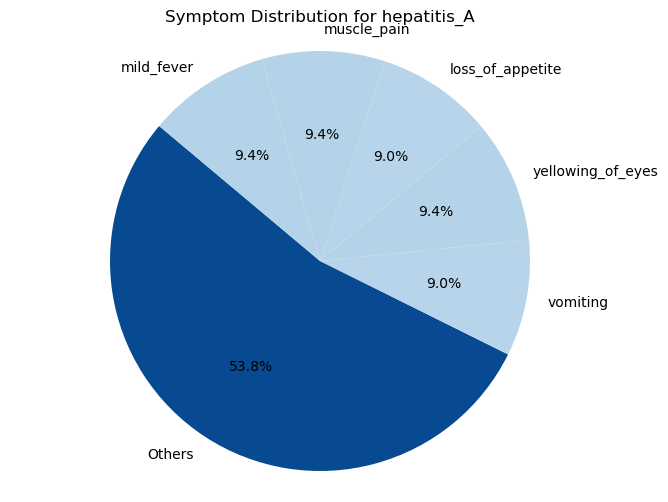

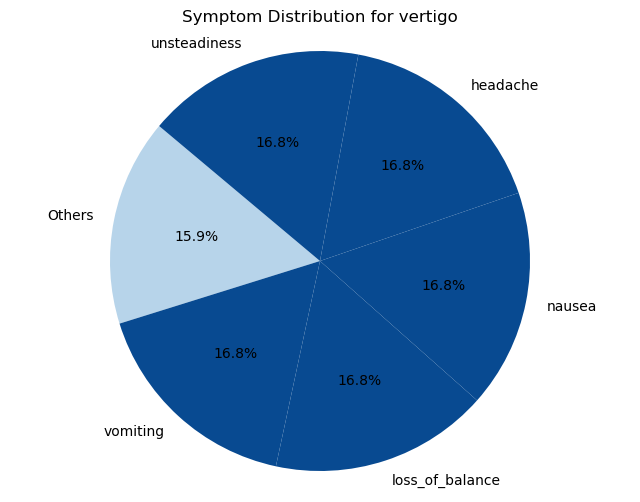

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('C:/Users/Srujana/OneDrive/Desktop/big data/dataset/training.csv')
data_cleaned = data.drop(columns=[col for col in data.columns if "Unnamed" in col])

symptoms_by_disease = data_cleaned.groupby('prognosis').sum()

pie_chart_data_top5 = {}
for disease, symptoms in symptoms_by_disease.iterrows():
    sorted_symptoms = symptoms.sort_values(ascending=False)
    top_symptoms = sorted_symptoms.head(5)
    other_symptoms = sorted_symptoms[5:].sum()
    pie_chart_data_top5[disease] = top_symptoms
    pie_chart_data_top5[disease]['Others'] = other_symptoms

pie_chart_df_top5 = pd.DataFrame.from_dict(pie_chart_data_top5, orient='index')

def create_pie_chart_clean(data, disease):
    filtered_data = data.loc[disease].dropna()
    if filtered_data['Others'] == 0:
        filtered_data = filtered_data.drop('Others')
    labels = [index if value > 0 else '' for index, value in filtered_data.items()]
    colors = [plt.cm.Blues(np.interp(value, [filtered_data.min(), filtered_data.max()], [0.3, 0.9])) for value in filtered_data]
    plt.figure(figsize=(8, 6))
    plt.pie(filtered_data, labels=labels, autopct=lambda pct: f'{pct:.1f}%' if pct > 0 else '', startangle=140, colors=colors)
    plt.title(f'Symptom Distribution for {disease}')
    plt.axis('equal') 
    plt.show()

diseases_to_plot_top5 = pie_chart_df_top5.index 
for disease in diseases_to_plot_top5:
    create_pie_chart_clean(pie_chart_df_top5, disease)
